In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

from sklearn.cluster import KMeans
import numpy as np

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df = df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'})

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

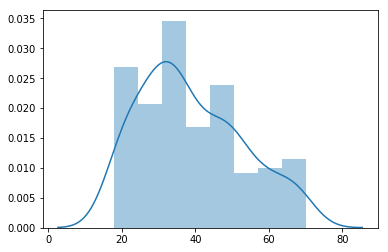

In [8]:
sns.distplot(df[['Age']],label='Age')

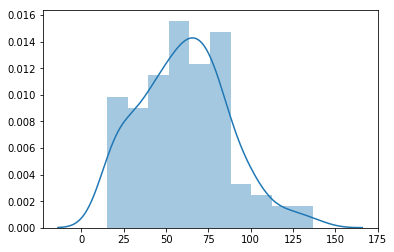

In [9]:
sns.distplot(df[['Annual_Income']],label='Annual Income')

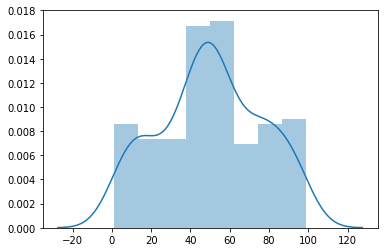

In [10]:
sns.distplot(df[['Spending_Score']],label='Spending Score')

In [11]:
df2 = df.loc[:,['Gender','Age', 'Annual_Income', 'Spending_Score']]
df2.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


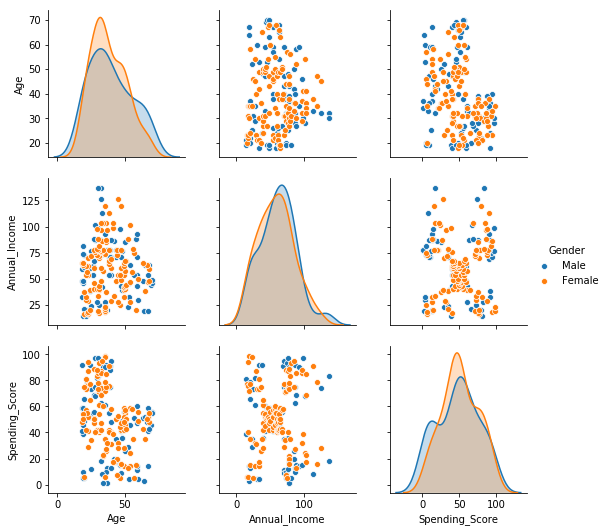

In [12]:
sns.pairplot(df2,hue='Gender')

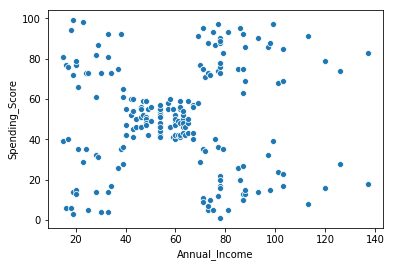

In [13]:
sns.scatterplot(data=df2,x='Annual_Income',y='Spending_Score')

In [14]:
X = df[['Annual_Income','Spending_Score']]
X.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [15]:
kmeans = KMeans(n_clusters=5,random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans
K = pd.DataFrame(y_kmeans,columns=['kmeans'])
K.head()

,kmeans
0,4
1,3
2,4
3,3
4,4


In [16]:
Z = pd.concat([X,K], axis=1)
Z.head()

,Annual_Income,Spending_Score,kmeans
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


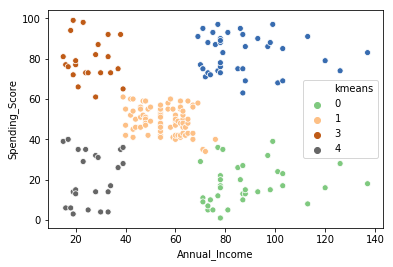

In [17]:
sns.scatterplot(data=Z,x='Annual_Income',y='Spending_Score',hue='kmeans',palette='Accent')
#After plotting this, we found five significants segmentations of customer as the graph show.